In [76]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

In [77]:
start = timeit.default_timer()

# temp = [north, east, south, west]
temp = [40, 40, 0, 0]

x_mesh = 10
y_mesh = 5
mesh_elems = (x_mesh-2) * (y_mesh-2)

# defining the plate
plate = np.zeros((x_mesh, y_mesh))
plate[0,:] = mesh_elems + 1
plate[:,-1] = mesh_elems + 2
plate[-1,:] = mesh_elems + 3
plate[:,0] = mesh_elems + 4

node_num = 1
for i in range(x_mesh-2, 0, -1):
    for j in range(1, y_mesh-1):
        plate[i,j] = node_num
        node_num += 1

print(plate)

[[28. 25. 25. 25. 26.]
 [28. 22. 23. 24. 26.]
 [28. 19. 20. 21. 26.]
 [28. 16. 17. 18. 26.]
 [28. 13. 14. 15. 26.]
 [28. 10. 11. 12. 26.]
 [28.  7.  8.  9. 26.]
 [28.  4.  5.  6. 26.]
 [28.  1.  2.  3. 26.]
 [28. 27. 27. 27. 27.]]


In [78]:
A_lg = np.zeros((mesh_elems, mesh_elems+4))

# Define A_lg as A with b's properties built in
for i in range(0,x_mesh):
    for j in range(0,y_mesh):
        if plate[i,j] <= mesh_elems:
            # current
            A_lg[int(plate[i,j]-1), int(plate[i,j]-1)] = -4
            # bottom
            A_lg[int(plate[i,j]-1), int(plate[i+1,j]-1)] = 1
            # top
            A_lg[int(plate[i,j]-1), int(plate[i-1,j]-1)] = 1
            # right
            A_lg[int(plate[i,j]-1), int(plate[i,j+1]-1)] = 1
            # left
            A_lg[int(plate[i,j]-1), int(plate[i,j-1]-1)] = 1
            
print(A_lg)

[[-4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  1.  1.]
 [ 1. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1. -4.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  0. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  1. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  1. -4.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  1. -4.  1.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  1. -4.  0.  0.  1.  0.  0.  0.  0

In [79]:
# Split up A_lg
b_matrix = A_lg[:, -4:]
A = A_lg[:, :mesh_elems]

# define b from b_matrix
b = np.zeros((mesh_elems, 1))
for i in range(0, mesh_elems):
    for j in range(0, 4):
        if b_matrix[i,j]==1:
            b[i] -= temp[j]
print(b)

[[  0.]
 [  0.]
 [-40.]
 [  0.]
 [  0.]
 [-40.]
 [  0.]
 [  0.]
 [-40.]
 [  0.]
 [  0.]
 [-40.]
 [  0.]
 [  0.]
 [-40.]
 [  0.]
 [  0.]
 [-40.]
 [  0.]
 [  0.]
 [-40.]
 [-40.]
 [-40.]
 [-80.]]


In [80]:
# calculate temp distribution and reshape
x = np.linalg.solve(A, b)
T = np.reshape(x, (x_mesh-2, y_mesh-2))
print(T)

[[ 4.07098536  9.41156159 18.71150824]
 [ 6.87237985 14.86375277 25.43447136]
 [ 8.55478128 17.73659828 28.16262441]
 [ 9.61014698 19.36523466 29.47942802]
 [10.52057198 20.63476534 30.38985302]
 [11.83737559 22.26340172 31.44521872]
 [14.56552864 25.13624723 33.12762015]
 [21.28849176 30.58843841 35.92901464]]


Time:  0.07013287500001297


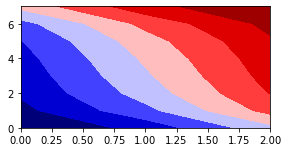

In [81]:
# plot
x_dim = (x_mesh/((x_mesh**2 + y_mesh**2)**(1/2)))*5
y_dim = (y_mesh/((x_mesh**2 + y_mesh**2)**(1/2)))*5

cmap = plt.cm.get_cmap("seismic")
plt.figure(figsize=(x_dim, y_dim))
plt.contourf(T, cmap=cmap)
plt.show

stop = timeit.default_timer()
print('Time: ', stop - start)